In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

### 随机森林回归预测 

In [13]:
rfg = RandomForestRegressor(n_estimators=25)
rfg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [14]:
boston = load_boston()

In [15]:
score = cross_val_score(rfg, boston.data, boston.target
                        , cv = 10
                        , scoring = 'neg_mean_squared_error' # 评判标准
                       )
score

array([-10.35399906,  -6.50889725,  -5.47784847, -25.88531169,
       -11.94012675, -15.89315608,  -7.5308672 , -94.4452512 ,
       -35.32663904, -13.97892032])

In [16]:
# sklearn模型评估的准则
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

### 处理缺失值

In [17]:
boston.data.shape

(506, 13)

In [18]:
x_full, y_full = boston.data, boston.target
n_samples = x_full.shape[0]
n_features = x_full.shape[1]

#### 制造缺失值

In [19]:
rng = np.random.RandomState(0)
# 50%的缺失率
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
print("缺失值：", n_missing_samples)

缺失值： 3289


In [20]:
# 取得缺失值的特征和样本 增加随机性
missing_features = rng.randint(0, n_features, n_missing_samples)
missing_samples = rng.randint(0, n_samples, n_missing_samples)
print("missing_features", missing_features )
print("missing_samples", missing_samples)

missing_features [12  5  0 ... 11  0  2]
missing_samples [150 125  28 ... 132 456 402]


In [21]:
# 添补缺失值
x_missing = x_full.copy()
y_missing = y_full.copy()

x_missing[missing_samples, missing_features] = np.nan

In [22]:
x_missing = pd.DataFrame(x_missing)
x_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [23]:
x_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     306 non-null float64
1     305 non-null float64
2     306 non-null float64
3     303 non-null float64
4     304 non-null float64
5     305 non-null float64
6     321 non-null float64
7     309 non-null float64
8     310 non-null float64
9     309 non-null float64
10    302 non-null float64
11    292 non-null float64
12    317 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


#### 均值填充缺失值

In [24]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_mean

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [25]:
x_missing_mean = imp_mean.fit_transform(x_missing)

In [26]:
# 添补缺失值:mean
pd.DataFrame(x_missing_mean).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [27]:
pd.DataFrame(x_missing_mean).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.627579,18.000000,11.163464,0.066007,0.538000,6.305921,65.2,4.090000,1.000000,296.000000,18.521192,352.741952,4.980000
1,0.027310,0.000000,11.163464,0.000000,0.469000,6.305921,78.9,4.967100,2.000000,405.935275,18.521192,396.900000,9.140000
2,0.027290,10.722951,7.070000,0.000000,0.564128,7.185000,61.1,3.856371,2.000000,242.000000,18.521192,352.741952,12.991767
3,3.627579,10.722951,11.163464,0.000000,0.458000,6.305921,45.8,3.856371,9.383871,222.000000,18.700000,352.741952,12.991767
4,3.627579,0.000000,2.180000,0.000000,0.564128,7.147000,67.4,3.856371,9.383871,405.935275,18.700000,352.741952,5.330000


#### 均值填充缺失值

In [28]:
imp_zero = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
x_missing_zero = imp_zero.fit_transform(x_missing)

In [29]:
pd.DataFrame(x_missing_zero).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [30]:
pd.DataFrame(x_missing_zero).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,4.0900,1.0,296.0,0.0,0.0,4.98
1,0.02731,0.0,0.00,0.0,0.469,0.000,78.9,4.9671,2.0,0.0,0.0,396.9,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,61.1,0.0000,2.0,242.0,0.0,0.0,0.00
3,0.00000,0.0,0.00,0.0,0.458,0.000,45.8,0.0000,0.0,222.0,18.7,0.0,0.00
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0,0.0000,0.0,0.0,18.7,0.0,5.33


#### 使用随机森林来预测添补缺失值  
  任何回归都是从特征矩阵中学习，然后求解连续型标签y的过程，之所以能够实现这个过程，是因为回归算法认为，特征
矩阵和标签之前存在着某种联系。实际上，标签和特征是可以相互转换的，比如说，在一个“用地区，环境，附近学校数
量”预测“房价”的问题中，我们既可以用“地区”，“环境”，“附近学校数量”的数据来预测“房价”，也可以反过来，

用“环境”，“附近学校数量”和“房价”来预测“地区”。而回归填补缺失值，正是利用了这种思想.

In [31]:
x_missing_reg = x_missing.copy()

In [32]:
sortindex = np.argsort(x_missing.isnull().sum()).values
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11])

In [33]:
for i in sortindex:
    """从最小的缺失特征开始遍历"""
    df = x_missing_reg
    fillc = df.iloc[:, i]
    df = pd.concat([df.iloc[:, df.columns != i], pd.DataFrame(y_full)], axis=1)
    
    #其他缺失特征默认以零填充
    df_0 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0).fit_transform(df)
    
    # 去处训练集和测试集(默认以空值未测试值)
    Y_train = fillc[fillc.notnull()]
    Y_test = fillc[fillc.isnull()]
    
    X_train = df_0[Y_train.index, :]
    X_test = df_0[Y_test.index, :]
    
    rfr = RandomForestRegressor(n_estimators=100)
    rfr = rfr.fit(X_train, Y_train)
    Y_predict = rfr.predict(X_test)
    
    x_missing_reg.loc[x_missing_reg.iloc[:, i].isnull(), i] = Y_predict    

In [34]:
x = [x_full, x_missing_mean, x_missing_zero, x_missing_reg]

mse = []
std = []

for i in x:
    estimator = RandomForestRegressor(random_state=10
                                     ,n_estimators = 100
                                     )
    score =  cross_val_score(estimator, i, y_full,scoring = "neg_mean_squared_error", cv = 10).mean()
    mse.append(-score)

In [35]:
[*zip(["x_full", "x_missing_mean", "x_missing_zero", "x_missing_reg"], mse)]

[('x_full', 22.068120025176466),
 ('x_missing_mean', 41.65513931886275),
 ('x_missing_zero', 45.18132287070587),
 ('x_missing_reg', 18.69377628945098)]

#### 显示化score

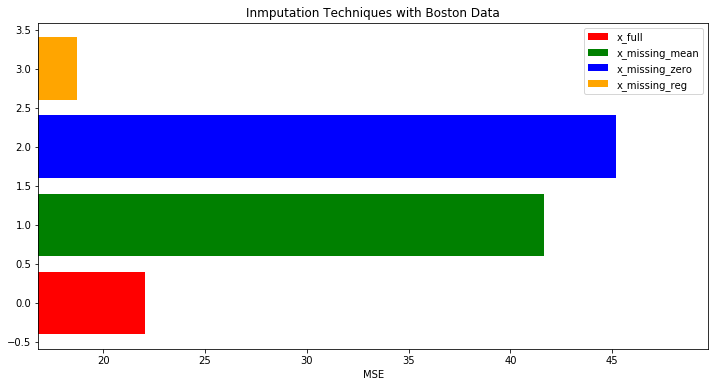

In [40]:
x_label = ["x_full", "x_missing_mean", "x_missing_zero", "x_missing_reg"]
colors = ["r", "g", "b", "orange"]

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in range(len(x_label)):
    ax.barh(i, mse[i], color = colors[i], label = x_label[i])
ax.set_title("Inmputation Techniques with Boston Data")

ax.set_xlim(left = np.min(mse)*0.9,
           right = np.max(mse)*1.1)

ax.set_xlabel("MSE")
plt.legend()
plt.savefig("./imgs/填充缺失值.png")
plt.show()